In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tree = pd.read_csv('../Data/tree_algorithm/set_tree.csv')
sdf = pd.read_csv('../Data/tree_algorithm/set_particles.csv')
tree

,x_min,y_min,side,depth,n
0,0.000000,0.000000,1.000000,0,1000
1,0.000000,0.000000,0.200000,1,47
2,0.000000,0.000000,0.200000,2,47
3,0.000000,0.000000,0.066667,3,6
4,0.066667,0.000000,0.066667,3,3
...,...,...,...,...,...
267,0.866667,0.866667,0.066667,4,5
268,0.933333,0.866667,0.066667,4,7
269,0.800000,0.933333,0.066667,4,5
270,0.866667,0.933333,0.066667,4,5


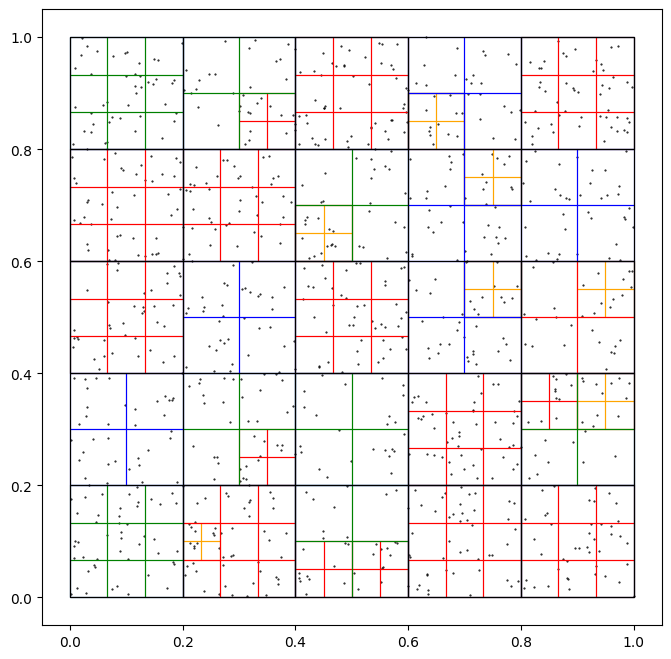

In [3]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "red", "orange", "yellow", "k"]
fig = plt.figure(figsize=(8,8))
#add rectangle
for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor=col[tree["depth"][i]-1],
                    facecolor='none',
                    lw=0.8, zorder=10-tree["depth"][i]))
plt.plot(sdf['x'], sdf['y'], '.', color='k', ms=1)
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [4]:
part = pd.read_csv('../Data/tree_algorithm/set_neighbors.csv')
particle = part["p"][0]
neightbors = part["p"][1:]

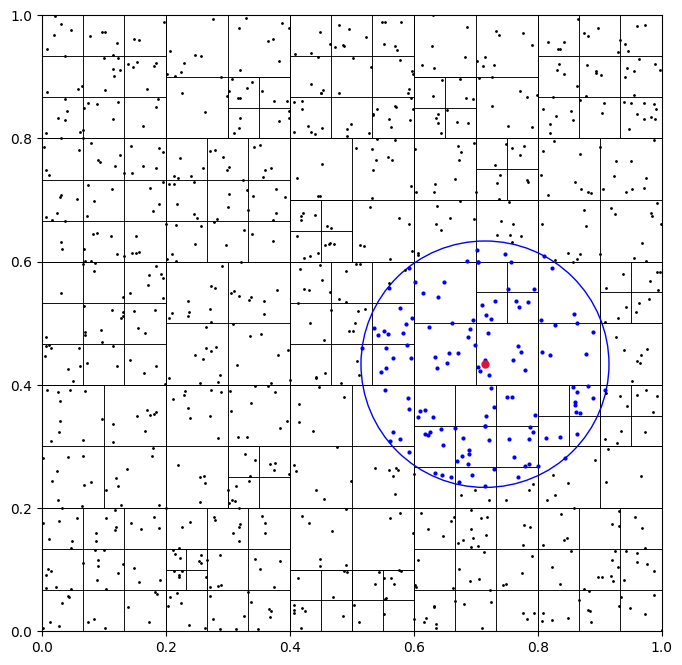

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(sdf['x'], sdf['y'], '.', color='k', ms=2)
plt.plot(sdf['x'][neightbors], sdf['y'][neightbors], '.', color='blue', ms=4)
plt.plot(sdf['x'][particle], sdf['y'][particle], 'o', color='crimson', ms=5)

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree["x_min"][i],tree["y_min"][i]),tree["side"][i],tree["side"][i],
                    edgecolor="k",
                    facecolor='none',
                    lw=0.5))

compact_domain = plt.Circle((sdf['x'][particle], sdf['y'][particle]), 2*sdf["h"][particle], color='b', fill=False)
ax.add_patch(compact_domain)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()